### Import Libs

In [96]:
import random
import numpy as np
from matplotlib.pyplot import imshow, imread
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_sample_images
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

### Show Sample Images

In [8]:
sample_images = load_sample_images()

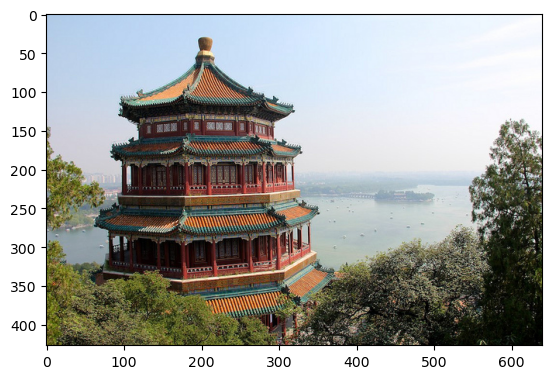

In [9]:
imshow(images.images[0])

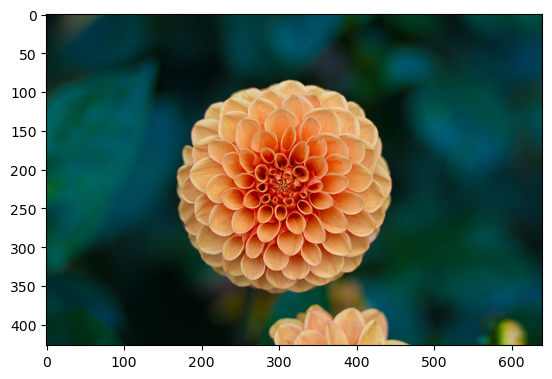

In [10]:
imshow(images.images[1])

In [11]:
images.images[0].shape, images.images[1].shape

((427, 640, 3), (427, 640, 3))

### Digits

#### Importing Data

In [15]:
digits = load_digits()

In [18]:
digits.data.shape

(1797, 64)

In [21]:
digits.data.max()

16.0

#### Checking Images with Random Index

Index: 1737
Digit: 1


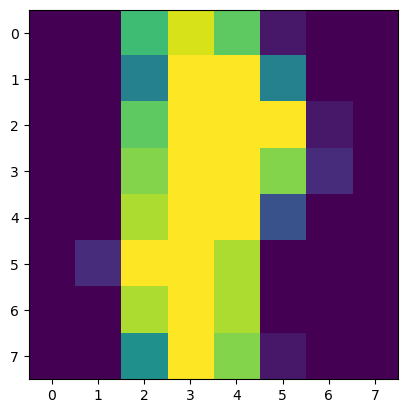

In [34]:
ix = random.randint(0, digits.data.shape[0])
dim = np.int32(np.sqrt(digits.data.shape[1]))
print(f'Index: {ix}')
print(f'Digit: {digits.target[ix]}')
imshow(digits.data[ix].reshape((dim, dim)))

#### Splitting Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)

#### Logistic Regression Pipeline with Evaluation

In [50]:
preprocessor = FeatureUnion([
     ("original", make_pipeline('passthrough')),
     ("scaler", MinMaxScaler())
])

pipeline = Pipeline([('preprocessor', preprocessor), ('train', LogisticRegressionCV(cv=5, max_iter=10000))])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9749652294853964

In [51]:
y_test_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.95      0.96      0.95        72
           2       0.94      1.00      0.97        66
           3       1.00      0.97      0.99        71
           4       1.00      0.99      0.99        78
           5       0.96      0.95      0.96        83
           6       0.99      0.99      0.99        69
           7       1.00      0.99      0.99        71
           8       0.94      0.95      0.95        65
           9       0.97      0.96      0.97        77

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.97      0.98       719



Index: 204
Digit: 8


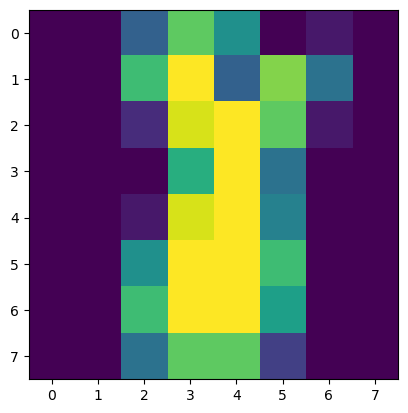

In [54]:
ix = random.randint(0, X_test.shape[0])
dim = np.int32(np.sqrt(X_test.shape[1]))
print(f'Index: {ix}')
print(f'Digit: {y_test_hat[ix]}')
imshow(X_test[ix].reshape((dim, dim)))

#### SGD Classifier Pipeline with Evaluation

In [55]:
preprocessor = FeatureUnion([
     ("original", make_pipeline('passthrough')),
     ("scaler", MinMaxScaler())
])

pipeline = Pipeline([('preprocessor', preprocessor), ('train', SGDClassifier())])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9429763560500696

In [56]:
y_test_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.98      0.82      0.89        72
           2       0.94      1.00      0.97        66
           3       0.98      0.87      0.93        71
           4       0.99      0.97      0.98        78
           5       0.96      0.98      0.97        83
           6       0.97      0.99      0.98        69
           7       0.96      0.99      0.97        71
           8       0.71      0.98      0.83        65
           9       1.00      0.86      0.92        77

    accuracy                           0.94       719
   macro avg       0.95      0.94      0.94       719
weighted avg       0.95      0.94      0.94       719



Index: 252
Digit: 2


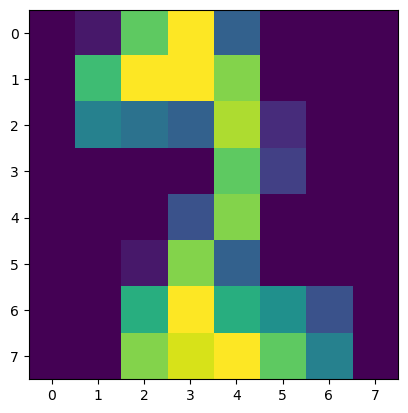

In [60]:
ix = random.randint(0, X_test.shape[0])
dim = np.int32(np.sqrt(X_test.shape[1]))
print(f'Index: {ix}')
print(f'Digit: {y_test_hat[ix]}')
imshow(X_test[ix].reshape((dim, dim)))

#### MLP Classifier Pipeline with Evaluation

In [61]:
preprocessor = FeatureUnion([
     ("original", make_pipeline('passthrough')),
     ("scaler", MinMaxScaler())
])

pipeline = Pipeline([('preprocessor', preprocessor), ('train', MLPClassifier())])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9791376912378303

In [62]:
y_test_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.99      0.97        72
           2       1.00      1.00      1.00        66
           3       0.99      0.96      0.97        71
           4       0.99      1.00      0.99        78
           5       0.98      0.95      0.96        83
           6       1.00      0.99      0.99        69
           7       0.97      0.99      0.98        71
           8       0.95      0.95      0.95        65
           9       0.96      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



Index: 213
Digit: 6


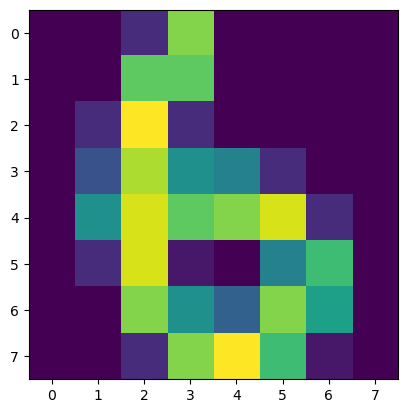

In [64]:
ix = random.randint(0, X_test.shape[0])
dim = np.int32(np.sqrt(X_test.shape[1]))
print(f'Index: {ix}')
print(f'Digit: {y_test_hat[ix]}')
imshow(X_test[ix].reshape((dim, dim)))

### Olivetti Faces

#### Importing Data

In [75]:
faces = fetch_olivetti_faces()

In [76]:
faces.data.shape

(400, 4096)

In [79]:
faces.data.min(), faces.data.max()

(0.0, 1.0)

#### Checking Images with Random Index

Index: 93
Face: 9


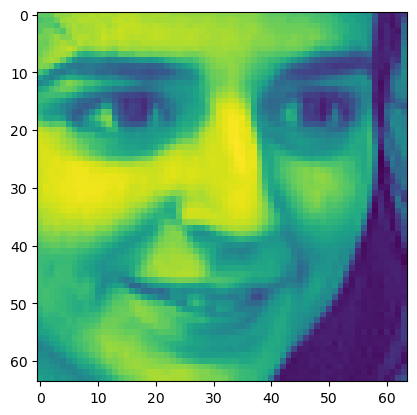

In [88]:
ix = random.randint(0, faces.data.shmax_iter=0])
dim = np.int32(np.sqrt(faces.data.shape[1]))
print(f'Index: {ix}')
print(f'Face: {faces.target[ix]}')
imshow(faces.data[ix].reshape((dim, dim)))

#### Splitting Data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=42)

#### Logistic Regression

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.93125

In [101]:
y_test_hat = logreg.predict(X_test)
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         6
           2       0.50      0.67      0.57         3
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         3
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       0.67      1.00      0.80         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         2
          17       1.00    

Index: 94
Face Actual: 18
Face Prediction: 18


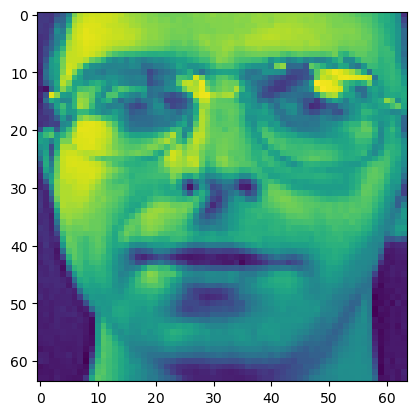

In [105]:
ix = random.randint(0, X_test.shape[0])
dim = np.int32(np.sqrt(X_test.shape[1]))
print(f'Index: {ix}')
print(f'Face Actual: {y_test[ix]}')
print(f'Face Prediction: {y_test_hat[ix]}')
imshow(X_test[ix].reshape((dim, dim)))

#### SGD Classifier

In [107]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.79375

In [108]:
y_test_hat = sgd.predict(X_test)
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.50      0.67         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         5
           4       0.67      0.67      0.67         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      0.80      0.89         5
          11       0.44      1.00      0.61         7
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         4
          14       0.67      1.00      0.80         4
          15       1.00      0.83      0.91         6
          16       0.67      1.00      0.80         2
          17       0.83    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Index: 123
Face Actual: 34
Face Prediction: 34


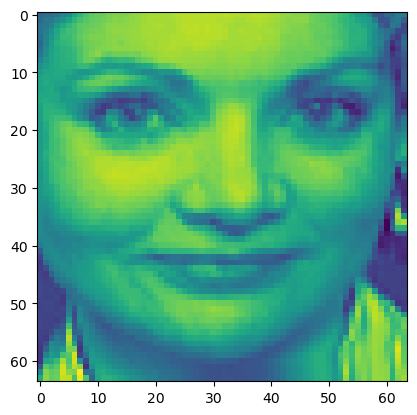

In [120]:
ix = random.randint(0, X_test.shape[0])
dim = np.int32(np.sqrt(X_test.shape[1]))
print(f'Index: {ix}')
print(f'Face Actual: {y_test[ix]}')
print(f'Face Prediction: {y_test_hat[ix]}')
imshow(X_test[ix].reshape((dim, dim)))

#### MLP Classifier

In [123]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.28125

In [124]:
y_test_hat = mlp.predict(X_test)
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.17      0.29         6
           2       0.14      0.33      0.20         3
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         8
           8       0.33      0.67      0.44         3
           9       0.25      0.67      0.36         3
          10       0.80      0.80      0.80         5
          11       0.00      0.00      0.00         7
          12       0.50      0.50      0.50         2
          13       0.40      1.00      0.57         4
          14       1.00      0.50      0.67         4
          15       0.40      0.33      0.36         6
          16       0.25      1.00      0.40         2
          17       0.50    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Index: 137
Face Actual: 26
Face Prediction: 18


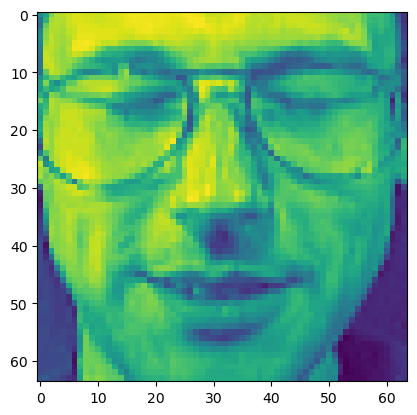

In [129]:
ix = random.randint(0, X_test.shape[0])
dim = np.int32(np.sqrt(X_test.shape[1]))
print(f'Index: {ix}')
print(f'Face Actual: {y_test[ix]}')
print(f'Face Prediction: {y_test_hat[ix]}')
imshow(X_test[ix].reshape((dim, dim)))